In [1]:
from googletrans import Translator
import easyocr
from gtts import gTTS

In [2]:
!wget https://i.stack.imgur.com/mk1jX.jpg

--2021-05-23 12:27:06--  https://i.stack.imgur.com/mk1jX.jpg
Resolving i.stack.imgur.com (i.stack.imgur.com)... 151.101.120.193
Connecting to i.stack.imgur.com (i.stack.imgur.com)|151.101.120.193|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 45178 (44K) [image/jpeg]
Saving to: ‘mk1jX.jpg.1’

mk1jX.jpg.1         100%[===================>]  44.12K   232KB/s    in 0.2s    

2021-05-23 12:27:07 (232 KB/s) - ‘mk1jX.jpg.1’ saved [45178/45178]



In [3]:
from IPython.display import Audio

In [4]:
reader=easyocr.Reader(['ta'])
translator=Translator()

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


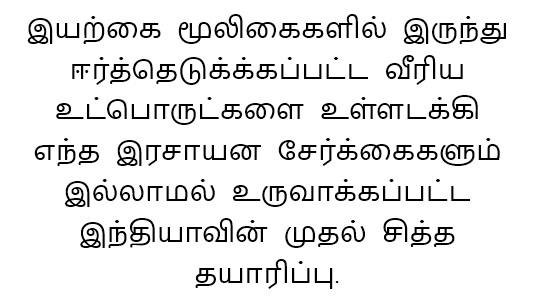

In [5]:
import PIL
from PIL import ImageDraw
im = PIL.Image.open("mk1jX.jpg")
im

In [6]:
bounds = reader.readtext('mk1jX.jpg', add_margin= 0.55, width_ths=0.7, link_threshold=0.8, decoder='beamsearch', blocklist='=.')
bounds

[([[32, 0], [532, 0], [532, 70], [32, 70]],
  'இயற்கை மூலிகைகளில் இருந்து',
  0.6782228204114737),
 ([[49, 29], [489, 29], [489, 110], [49, 110]],
  'ஈர்த்தெடுக்க்கப்பட்ட வீரிய',
  0.664616535024226),
 ([[38, 77], [324, 77], [324, 146], [38, 146]],
  'உட்பொருட்களை ',
  0.48477859500808473),
 ([[304, 78], [496, 78], [496, 140], [304, 140]],
  'உள்ளடக்கி',
  0.7778462675588437),
 ([[14, 118], [523, 118], [523, 188], [14, 188]],
  'ந்த இரசாயன சேர்க்கைகளும்',
  0.6194665213538573),
 ([[71, 156], [491, 156], [491, 229], [71, 229]],
  'இல்லாமல் உருவாக்கப்பட்ட',
  0.97429392359494),
 ([[60, 195], [478, 195], [478, 272], [60, 272]],
  'இந்தியாவின் முதல் சித்த',
  0.9620169661320367),
 ([[174, 237], [359, 237], [359, 303], [174, 303]],
  'தயாரிப்பு',
  0.5528100165287113)]

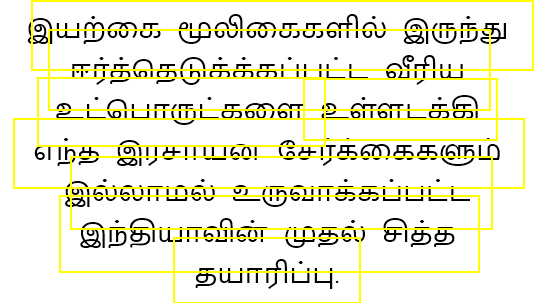

In [7]:
def draw_boxes(image, bounds, color ='yellow', width =2):
    draw = ImageDraw.Draw(image)
    for bound in bounds:
        p0, p1, p2, p3 = bound [0]
        draw.line([*p0, *p1, *p2, *p3, *p0], fill=color, width=width)
    return image

draw_boxes(im, bounds)

In [8]:
text_list = reader.readtext('mk1jX.jpg', add_margin= 0.55, width_ths=0.7, link_threshold=0.8, decoder='beamsearch', blocklist='=.',detail=0)

text_list

['இயற்கை மூலிகைகளில் இருந்து',
 'ஈர்த்தெடுக்க்கப்பட்ட வீரிய',
 'உட்பொருட்களை ',
 'உள்ளடக்கி',
 'ந்த இரசாயன சேர்க்கைகளும்',
 'இல்லாமல் உருவாக்கப்பட்ட',
 'இந்தியாவின் முதல் சித்த',
 'தயாரிப்பு']

In [28]:
text_comb=' '.join(text_list)
text_comb

'இயற்கை மூலிகைகளில் இருந்து ஈர்த்தெடுக்க்கப்பட்ட வீரிய உட்பொருட்களை  உள்ளடக்கி ந்த இரசாயன சேர்க்கைகளும் இல்லாமல் உருவாக்கப்பட்ட இந்தியாவின் முதல் சித்த தயாரிப்பு'

In [ ]:
#pip install google_trans_new

from google_trans_new import google_translator  
translator = google_translator()  

In [39]:
print(translator.detect(text_comb))

['ta', 'tamil']


In [45]:
text_en=translator.translate(text_comb,lang_tgt='en')
print(text_en)

India's first sentimental preparation created without chemical combinations of chemical combinations 


In [46]:
ta_tts=gTTS(text_en)
ta_tts.save('trans.mp3')

In [47]:
Audio('trans.mp3' , autoplay=True)

In [51]:
ta_tts=gTTS(text_en, lang='ko')
ta_tts.save('trans.mp3')

In [52]:
Audio('trans.mp3' , autoplay=True)

In [56]:
text_hi=translator.translate(text_comb,lang_tgt='hi' )
print(text_hi)

भारत की पहली भावनात्मक तैयारी रासायनिक संयोजनों के रासायनिक संयोजनों के बिना बनाई गई 


In [58]:
ta_tts_hi=gTTS(text_hi, lang='hi')
ta_tts_hi.save('trans_hi.mp3')

In [59]:
Audio('trans_hi.mp3' , autoplay=True)

In [61]:
text_fr=translator.translate(text_comb, lang_tgt='fr')
print(text_fr)

Première préparation sentimentale de l'Inde créée sans combinaisons chimiques de combinaisons de produits chimiques 


In [62]:
ta_tts_fr=gTTS(text_fr, lang='fr')
ta_tts_fr.save('trans_fr.mp3')

In [63]:
Audio('trans_fr.mp3' , autoplay=True)